# modeling
## use several ML techniques to build model
   0. Data Preprocessing
   1. DT  
   2. RF  
   3. Linear Regression  
   4. Logistic Regression  
   5. SVD    

In [1]:
import pandas as pd
import csv

## Data Preprocessing

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movie = pd.read_csv('movie_nonmulti_scaled.csv')


In [6]:
for i in movie :
    idx = movie[i]
    print(i)
    j = movie[idx.isnull()==True]
    print(j[i].axes[0])

movieCd
Int64Index([], dtype='int64')
showTm
Int64Index([ 415,  699,  804,  841,  886,  896,  938, 1498, 1636, 1640,
            ...
            5952, 6022, 6058, 6107, 6108, 6110, 6111, 6112, 6142, 6159],
           dtype='int64', length=165)
rating
Int64Index([   0,    2,    3,    4,    7,   12,   14,   15,   16,   18,
            ...
            6173, 6175, 6179, 6180, 6181, 6182, 6188, 6189, 6193, 6194],
           dtype='int64', length=2162)
type
Int64Index([], dtype='int64')
genre_1
Int64Index([ 178,  210,  223,  226,  243,  716,  852,  977,  993,  998, 1025,
            1064, 1081, 1106, 1107, 1338, 1445, 1460, 1498, 1543, 1636, 1640,
            1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1656, 1657,
            1661, 1683, 1691, 1697, 1700, 1706, 1749, 1770, 1871, 1879, 1924,
            2023, 2042, 2064, 2093, 2119, 2120, 2136, 2167, 2188, 2240, 2243,
            2246, 2249, 2251, 2252, 2267, 2269, 2339, 2745, 2781, 2900, 3579,
            4304, 4620, 4629, 4630, 46

In [36]:

remain_feature_list = ['showTm', 'genre_1', 'director_1', 'actor_1',
               'company_supply', 'company_making', 'grade', 'nation_1',
               'salesAcc', 'audiAcc',
               'rating']

remove_feature_list = ['movieCd', 'genre_2', 'genre_3', 'director_2', 'actor_2',
                       'actor_3', 'actor_4', 'actor_5', 'nation_2',
                       'nation_cnt', 'actor_cnt', 'director_cnt', 'genre_cnt',
                       'director', 'actor', 'genre', 'nation']

k = movie
   
for i in movie : 
    idx = movie[i]
    if (i in remain_feature_list) :
        j = movie[idx.isnull() == True]
        print(i+ " " +str(len(j)))
        for l in j[i].axes[0] :
            try :
                k = k.drop(l, axis = 0)
            except :
                continue
             

mov = k.drop(columns = [t for t in remove_feature_list], axis = 1)

showTm 163
rating 1464
director_1 460
actor_1 1194
company_supply 1536
company_making 2383
genre_1 83
grade 0
nation_1 3
salesAcc 0
audiAcc 0


In [37]:
mov['audiClass'] = 0
mov = mov.drop(columns = ['Unnamed: 0'])

def classification_by_audiences(mo):
    for i in range(len(mo)):
        if float(mo.iloc[i, 10]) < 500000:
            mo.iloc[i, 11] = 0 # '~50만'
        elif float(mo.iloc[i, 10]) < 1000000:
            mo.iloc[i, 11] = 1 # '~100만'
        elif float(mo.iloc[i, 10]) < 2000000:
            mo.iloc[i, 11] = 2 # '~200만'
        elif float(mo.iloc[i, 10]) < 5000000:
            mo.iloc[i, 11] = 3 # '~500만'
        elif float(mo.iloc[i, 10]) < 10000000:
            mo.iloc[i, 11] = 4 # '~1000만'
        else :
            mo.iloc[i, 11] = 5 # '1000만~'
            
    return mo

mo = classification_by_audiences(mov)

In [38]:
mo.to_csv('mov.csv', index = False, encoding = 'utf-8')

In [39]:
mov = mo

In [56]:
import json

with open('movie_data_table.json', 'r') as f :
    movie_data_table = json.load(f)
movie_data_table['grade']

{'12세관람가': '0',
 '전체관람가': '1',
 '12세이상관람가': '2',
 '15세관람가': '3',
 '12세 미만인 자는 관람할 수 없는 등급': '4',
 '': '5',
 '청소년관람불가': '6',
 '18세관람가': '7',
 '연소자관람불가': '8',
 '15세이상관람가': '9',
 '연소자관람가': '10',
 '고등학생이상관람가': '11',
 '중학생이상관람가': '12',
 '국민학생관람불가': '13',
 '미성년자관람불가': '14',
 '15세 미만인 자는 관람할 수 없는 등급 ': '15',
 '모든 관람객이 관람할 수 있는 등급': '16',
 '18세 미만인 자는 관람할 수 없는 등급': '17',
 '미정': '18',
 '기타': '19'}

In [63]:
mov = mov.drop(columns = ['salesAcc', 'audiAcc'])

In [64]:
from sklearn.model_selection import train_test_split

X = mov[mov.columns[0:9]]
y = mov[mov.columns[9]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
X.columns

Index(['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'],
      dtype='object')

In [82]:
mov[mov['audiClass'] == 0].count()

showTm            442
rating            442
director_1        442
actor_1           442
company_supply    442
company_making    442
genre_1           442
grade             442
nation_1          442
audiClass         442
dtype: int64

showTm            647
rating            647
director_1        647
actor_1           647
company_supply    647
company_making    647
genre_1           647
grade             647
nation_1          647
audiClass         647
dtype: int64

## Decision Tree

In [87]:
## 1. DT
# Decision Tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

movie_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', random_state = 0)
movie_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [24]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

NameError: name 'sc' is not defined

In [29]:
y_train

1992      ~50만
330      ~500만
1864     ~500만
1773      ~50만
2349      ~50만
1797      ~50만
3444      ~50만
3240     ~500만
2605      ~50만
1345     ~100만
1791      ~50만
1915      ~50만
1984      ~50만
1270      ~50만
3410      ~50만
2429     ~200만
2201      ~50만
1866     ~100만
1516     ~500만
2768      ~50만
680      ~500만
719     1000만~
1002     ~100만
1436     ~200만
260       ~50만
1558      ~50만
2601      ~50만
2002      ~50만
2491      ~50만
1977     ~200만
         ...  
2621      ~50만
3137      ~50만
1607      ~50만
315       ~50만
1879      ~50만
2535      ~50만
1074    ~1000만
1710      ~50만
1253      ~50만
2217      ~50만
2333     ~200만
2726     ~100만
2022      ~50만
1871    1000만~
814      ~100만
663      ~500만
2172      ~50만
631       ~50만
2531     ~200만
1980      ~50만
1386      ~50만
2568     ~100만
734       ~50만
3469      ~50만
314       ~50만
538      ~500만
685       ~50만
1698     ~100만
2411      ~50만
678      ~200만
Name: audiClass, Length: 517, dtype: object

In [88]:
from sklearn.metrics import accuracy_score

y_pred_tr = movie_tree.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.77


In [93]:
# from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_tr, labels=[0, 1, 2, 3, 4, 5])

array([[84,  2,  1,  2,  0,  0],
       [ 5,  5,  1,  0,  0,  0],
       [ 2,  1,  0,  3,  1,  0],
       [ 1,  2,  3, 11,  2,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0]])

In [71]:
movie_feature_names = np.array(['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'])

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(movie_tree, out_file="tree.dot",
                class_names=["~50만", "~100만", "~200만", "~500만", "~1000만", "1000만~"],
                feature_names = movie_feature_names,
                impurity = False, filled = True)

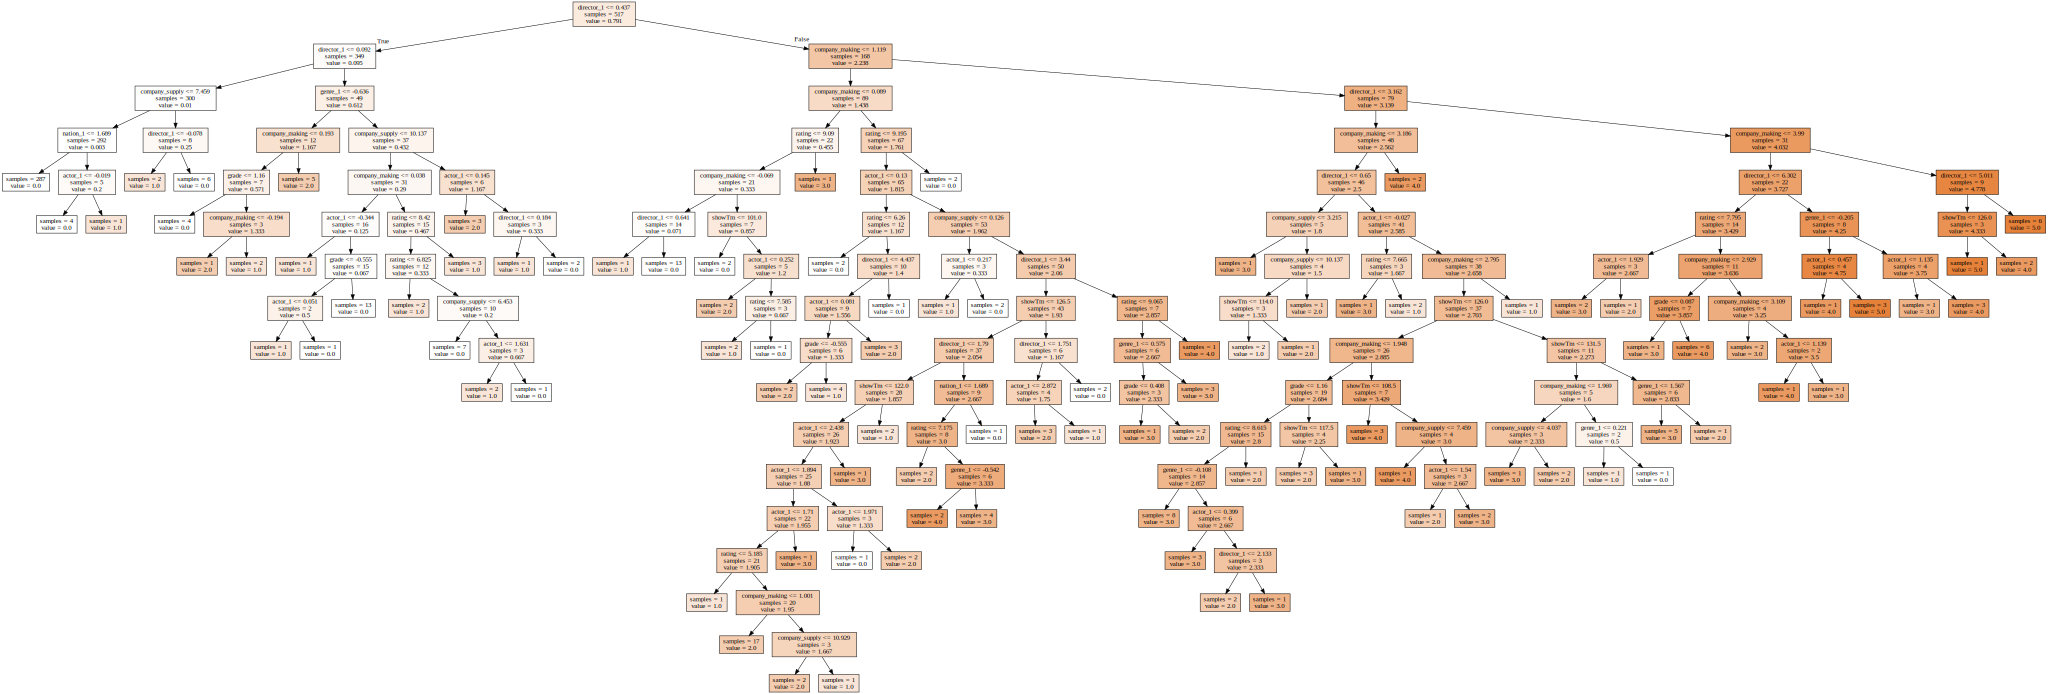

In [73]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [96]:
print("특성:", movie_feature_names)
print("특성 중요도:\n{}".format(movie_tree.feature_importances_))

특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply'
 'company_making' 'genre_1' 'grade' 'nation_1']
특성 중요도:
[0.02039191 0.03284207 0.66390327 0.03337317 0.020348   0.20045452
 0.01165465 0.00801962 0.00901278]


## Random Forest

In [75]:
## 2. RF
# Random Forest

from sklearn.ensemble import RandomForestClassifier

movie_rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=123456)
movie_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [ ]:
## change variables...

def plot_feature_importances_movie(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_movie(tree)

In [76]:
predicted = movie_rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {movie_rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.764
Mean accuracy score: 0.777


In [95]:
print("특성:", movie_feature_names)
print("특성 중요도:\n{}".format(movie_rf.feature_importances_))

특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply'
 'company_making' 'genre_1' 'grade' 'nation_1']


NameError: name 'movie_rf' is not defined

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted, labels=[0, 1, 2, 3, 4, 5])

array([[87,  1,  1,  0,  0,  0],
       [ 7,  1,  3,  0,  0,  0],
       [ 1,  0,  3,  2,  1,  0],
       [ 1,  1,  5, 10,  2,  0],
       [ 1,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0,  0]])

## Linear Regression

In [379]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = mov[['showTm', 'salesAcc']]

In [394]:
X = df
y = mov['audiAcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [395]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [396]:
y_pred = regr.predict(X_test)

Coefficients: 
 [   199.91634462 127208.01635362]
Mean squared error: 5583865167.24
Variance score: 1.00


ValueError: x and y must be the same size

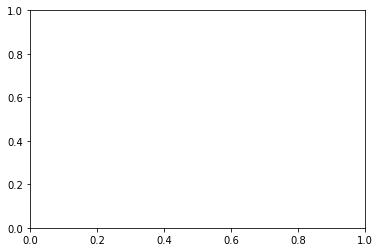

In [397]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Logistic Regression

## Support Vector Machine

## Analysis Dataset

In [ ]:
mov